In [1]:
import pandas as pd
import numpy as np
import sys
import multiprocessing
import time
import os

import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
from pandas.tseries.offsets import BDay
import pickle as pkl
import fnmatch
import pickle
import datetime as dt
from datetime import timedelta
import glob
import fathon
from fathon import fathonUtils as fu
import itertools
import matplotlib as mpl
from scipy.stats import jarque_bera
from multiprocessing import Pool, freeze_support, Manager
import itertools
colormap = plt.cm.RdBu
from scipy.cluster import hierarchy as hc
# plt.style.use(os.path.join(mpl.get_configdir(),'latexstyle3.mplstyle'))

import freqopttest.kernel as kernel

In [2]:
# !pip install git+https://github.com/wittawatj/interpretable-test

In [3]:
t7 = '/media/ak/T71/August11th2022Experiments'
folders = os.listdir(t7)
returns = os.path.join(t7, 'Returns')
expOne = os.path.join(t7, 'ExperimentOne')
expTwo = os.path.join(t7, 'ExperimentTwo')
mfdfa_dfs = os.path.join(t7, 'mfdfaDataFrames')
ExperimentInputFiles = os.path.join(t7, 'ExperimentInputFiles')
QuadMMDOutputFilesLoc = os.path.join(expOne, 'QuadMMDOutputFiles')
LinearMMDOutputFilesLoc = os.path.join(expOne, 'TestMMDOutputFiles')
# rx1 = os.path.join(ExperimentInputFiles, 'RX1')
figures = '/home/ak/Documents/Papers/StylisedFactsPaper/figures'

In [4]:
LinearMMDOutputFiles = os.listdir(LinearMMDOutputFilesLoc)
symbol = 'DU1'
SymbolLinearMMDOutputFiles = [f for f in LinearMMDOutputFiles if str(symbol) in f] 
variable_choice = 'tau'
tauFiles = [f for f in [f for f in SymbolLinearMMDOutputFiles if str(variable_choice) in f ] if str('_linear_') in f]


In [5]:
tauFiles

['DU1_tau_shift_1_wind_5_linear_test_ONE.pkl',
 'DU1_tau_shift_1_wind_5_linear_test_TWO.pkl',
 'DU1_tau_shift_2_wind_5_linear_test_ONE.pkl',
 'DU1_tau_shift_2_wind_5_linear_test_TWO.pkl',
 'DU1_tau_shift_2_wind_6_linear_test_ONE.pkl',
 'DU1_tau_shift_2_wind_6_linear_test_TWO.pkl',
 'DU1_tau_shift_3_wind_6_linear_test_ONE.pkl',
 'DU1_tau_shift_3_wind_6_linear_test_TWO.pkl',
 'DU1_tau_shift_3_wind_8_linear_test_ONE.pkl',
 'DU1_tau_shift_3_wind_8_linear_test_TWO.pkl',
 'DU1_tau_shift_3_wind_10_linear_test_ONE.pkl',
 'DU1_tau_shift_3_wind_10_linear_test_TWO.pkl',
 'DU1_tau_shift_1_wind_1_linear_test_ONE.pkl',
 'DU1_tau_shift_1_wind_1_linear_test_TWO.pkl',
 'DU1_tau_shift_1_wind_2_linear_test_ONE.pkl',
 'DU1_tau_shift_1_wind_2_linear_test_TWO.pkl',
 'DU1_tau_shift_1_wind_3_linear_test_ONE.pkl',
 'DU1_tau_shift_1_wind_3_linear_test_TWO.pkl',
 'DU1_tau_shift_1_wind_6_linear_test_ONE.pkl',
 'DU1_tau_shift_1_wind_6_linear_test_TWO.pkl',
 'DU1_tau_shift_1_wind_8_linear_test_ONE.pkl',
 'DU1_tau_s

In [63]:
#['widths',
#  'med',
#  'besti',
#  'powers',
#  'med_on_test_data',
#  'test_result',
#  'test_variance',
#  'two_moments',
#  'compute_unbiased_linear_estimator']

In [64]:
widths = tauFileDict[numIdx]['widths']
powers = tauFileDict[numIdx]['powers']
test_result = tauFileDict[numIdx]['test_result']
med = tauFileDict[numIdx]['med']
test_variance = tauFileDict[numIdx]['test_variance']
med_on_test_data = tauFileDict[numIdx]['med_on_test_data']
two_moments = tauFileDict[numIdx]['two_moments']
besti = tauFileDict[numIdx]['besti']


unbiased_linear_estimator = tauFileDict[numIdx]['compute_unbiased_linear_estimator']

In [73]:
# kernels

list_kernels = [kernel.KGauss( w**2 ) for w in widths]

In [75]:
best_ker = list_kernels[besti]
best_ker.sigma2

0.5362189803788823

In [65]:
unbiased_linear_estimator

0.07679834203449054

In [66]:
#test_result
alpha = test_result['alpha']
pvalue = test_result['pvalue']
test_stat = test_result['test_stat']
h0_rej = test_result['h0_rejected']

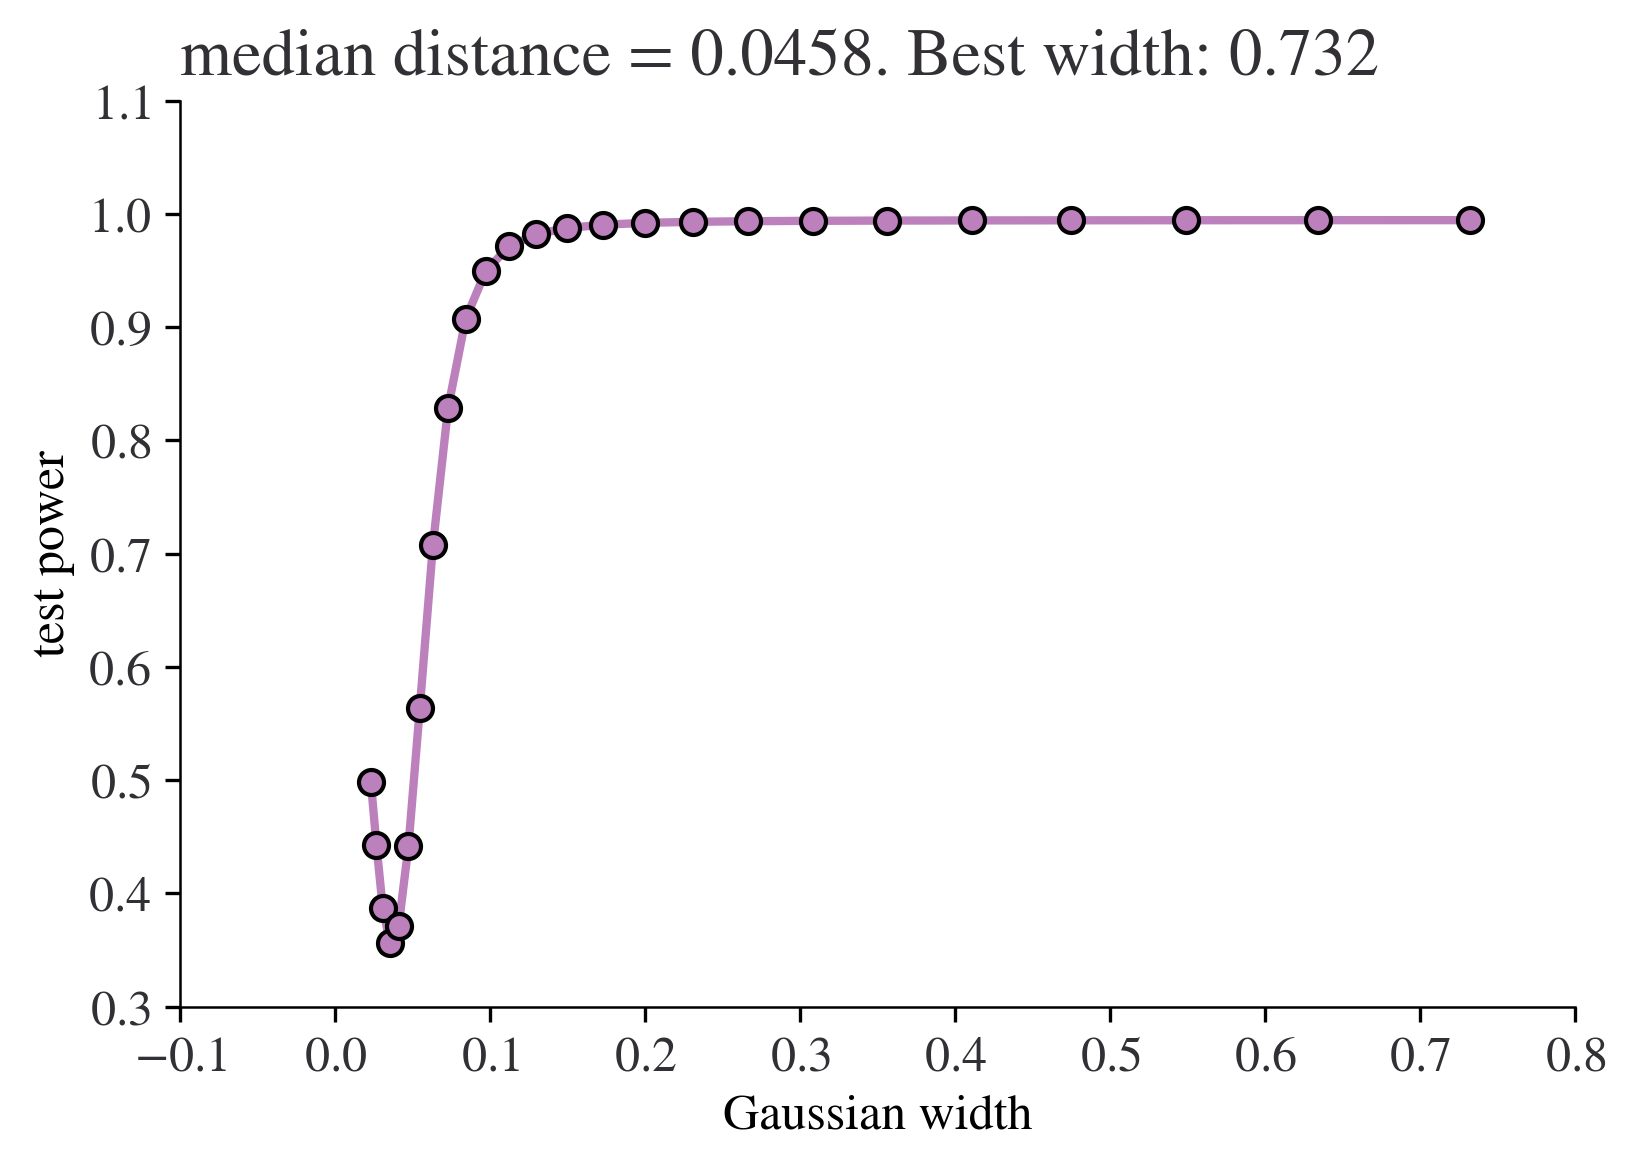

In [67]:
_=plt.plot(widths, powers, 'o-')
_ =plt.xlabel('Gaussian width')
_ =plt.ylabel('test power')
_=plt.title('median distance = %.3g. Best width: %.3g'%(med, widths[besti]) )

In [49]:
# # The actual test 
# best_ker = list_kernels[besti]
# lin_mmd_test = tst.LinearMMDTest(best_ker, alpha)
# test_result = lin_mmd_test.perform_test(te)
test_result

{'alpha': 0.01,
 'pvalue': 0.0006584187330949135,
 'test_stat': 0.07679834203449054,
 'h0_rejected': True}

In [68]:
###
alpha =0.01

In [77]:
file_dict = pd.read_pickle(file_to_load)
shifts = list(file_dict.keys())
keys = ['widths',
 'med',
 'besti',
 'powers',
 'med_on_test_data',
 'test_result',
 'test_variance',
 'two_moments',
 'compute_unbiased_linear_estimator']

###
alpha =0.01

In [80]:
widths_dict = {idxShift:file_dict[shifts[idxShift]]['widths'] for idxShift in range(0, len(shifts)) }
powers_dict = {idxShift:file_dict[shifts[idxShift]]['powers'] for idxShift in range(0, len(shifts)) }
med_dict = {idxShift:file_dict[shifts[idxShift]]['med'] for idxShift in range(0, len(shifts)) }
besti_dict = {idxShift:file_dict[shifts[idxShift]]['besti'] for idxShift in range(0, len(shifts)) }

test_variance_dict  = {idxShift:file_dict[shifts[idxShift]]['test_variance'] for idxShift in range(0, len(shifts)) }

compute_lin_unb_est_dict= {idxShift:file_dict[shifts[idxShift]]['compute_unbiased_linear_estimator'] for idxShift in range(0, len(shifts)) }
h0_rejected = {idxShift: file_dict[shifts[idxShift]]['test_result']['h0_rejected'] for idxShift in range(0, len(shifts)) }
p_stat = {idxShift: file_dict[shifts[idxShift]]['test_result']['test_stat'] for idxShift in range(0, len(shifts)) }


In [131]:
moment_one = {idxShift:file_dict[shifts[idxShift]]['two_moments'][0] for idxShift in range(0, len(shifts)) }
moment_two = {idxShift:file_dict[shifts[idxShift]]['two_moments'][1] for idxShift in range(0, len(shifts)) }


In [81]:
widths_df =pd.DataFrame.from_dict(widths_dict)
powers_df =pd.DataFrame.from_dict(powers_dict)
med_df = pd.DataFrame.from_dict(med_dict.values())
besti_df = pd.DataFrame.from_dict(besti_dict.values())

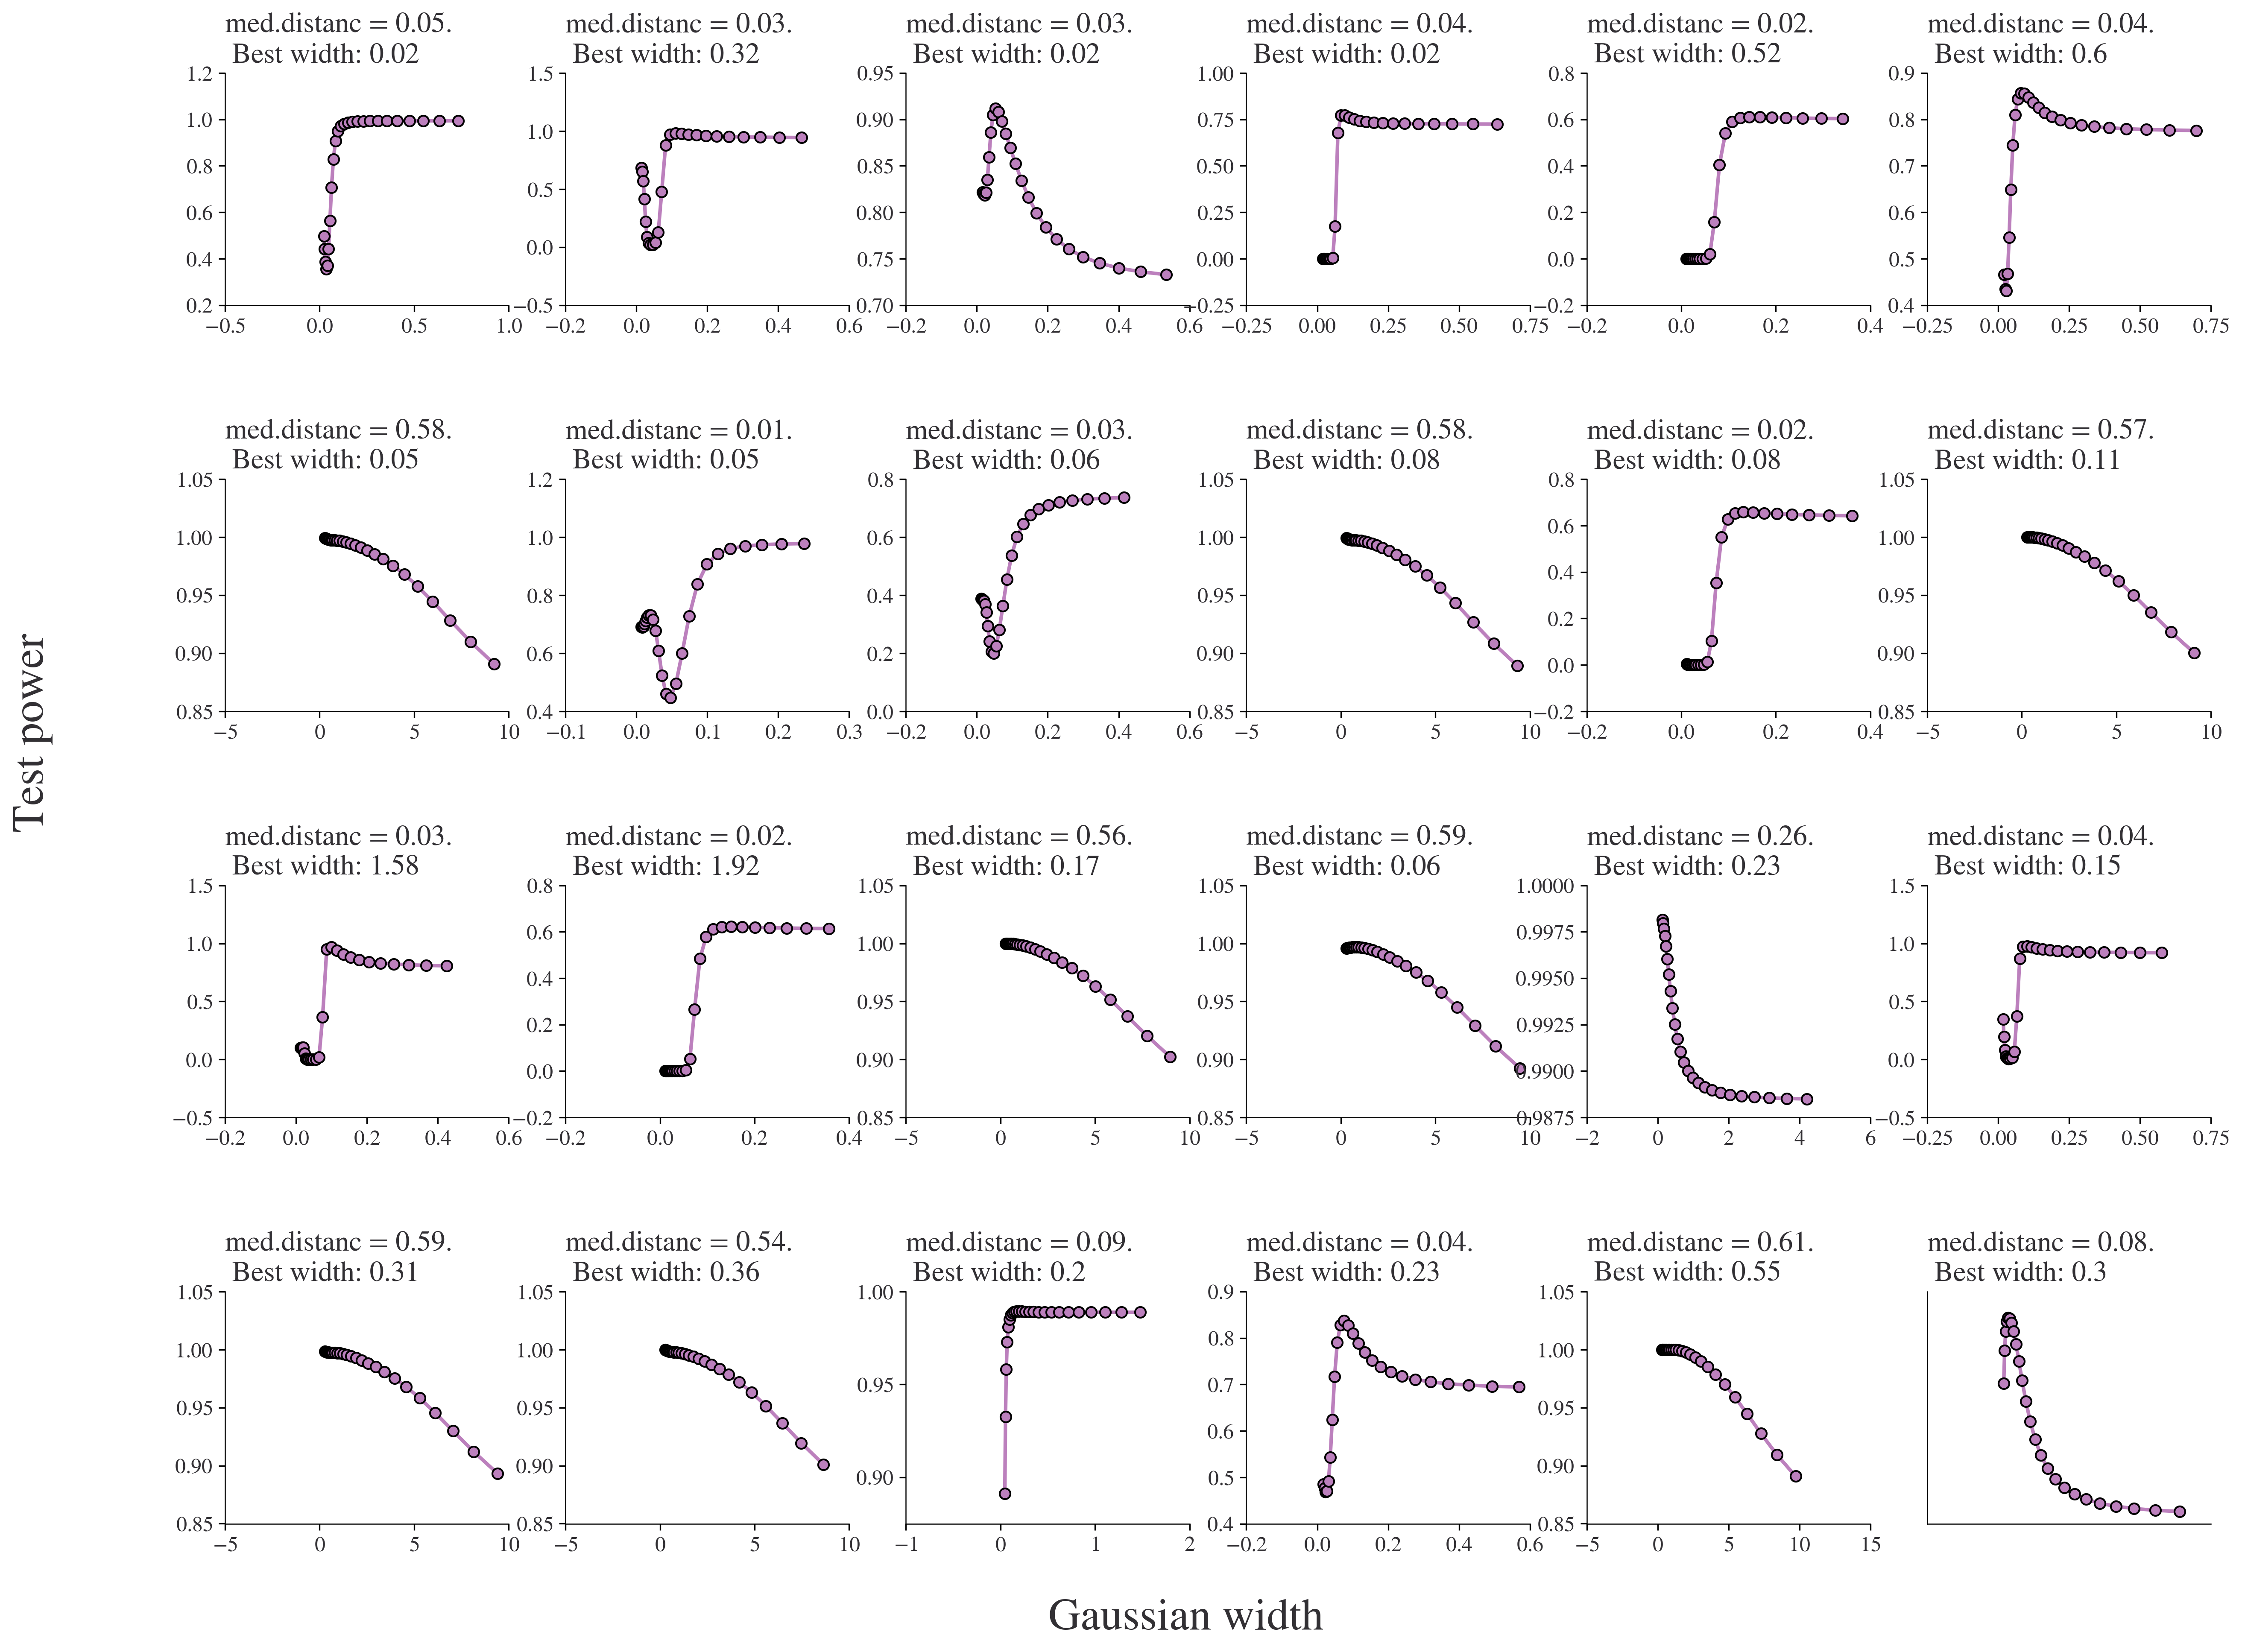

In [86]:
plt.figure(figsize=(20, 15))
# fig, axes = plt.subplots(5, 2, sharex=True, sharey=True, figsize=(6,15))
# add a big axis, hide frame
# fig.add_subplot(111, frameon=False)
plt.subplots_adjust(hspace=0.75)
for test_idx in range(0,24):
    ax = plt.subplot(4, 6, test_idx + 1)
    #ax.set_xlabel('Common x-label')
#     ax.set_ylabel('test power', fontsize= 20)


    ax.plot(widths_df[test_idx], powers_df[test_idx], 'o-')
#     plt.xlabel('Gaussian width')
#     plt.ylabel('test power')
    plt.title('med.distanc = %.3g. \n Best width: %.3g'%(round(med_df.iloc[test_idx].values[0],2), round(widths_df[besti_df.iloc[test_idx][0]][test_idx],2)) )

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
_=plt.figtext(.05,.49,'Test power', fontsize=25, ha='center',rotation=90)
_=plt.figtext(.5,0.07,'Gaussian width',fontsize=25,ha='center')
title = symbol +'_kernel_width_test_power.png'
plt.savefig(os.path.join(figures, title))

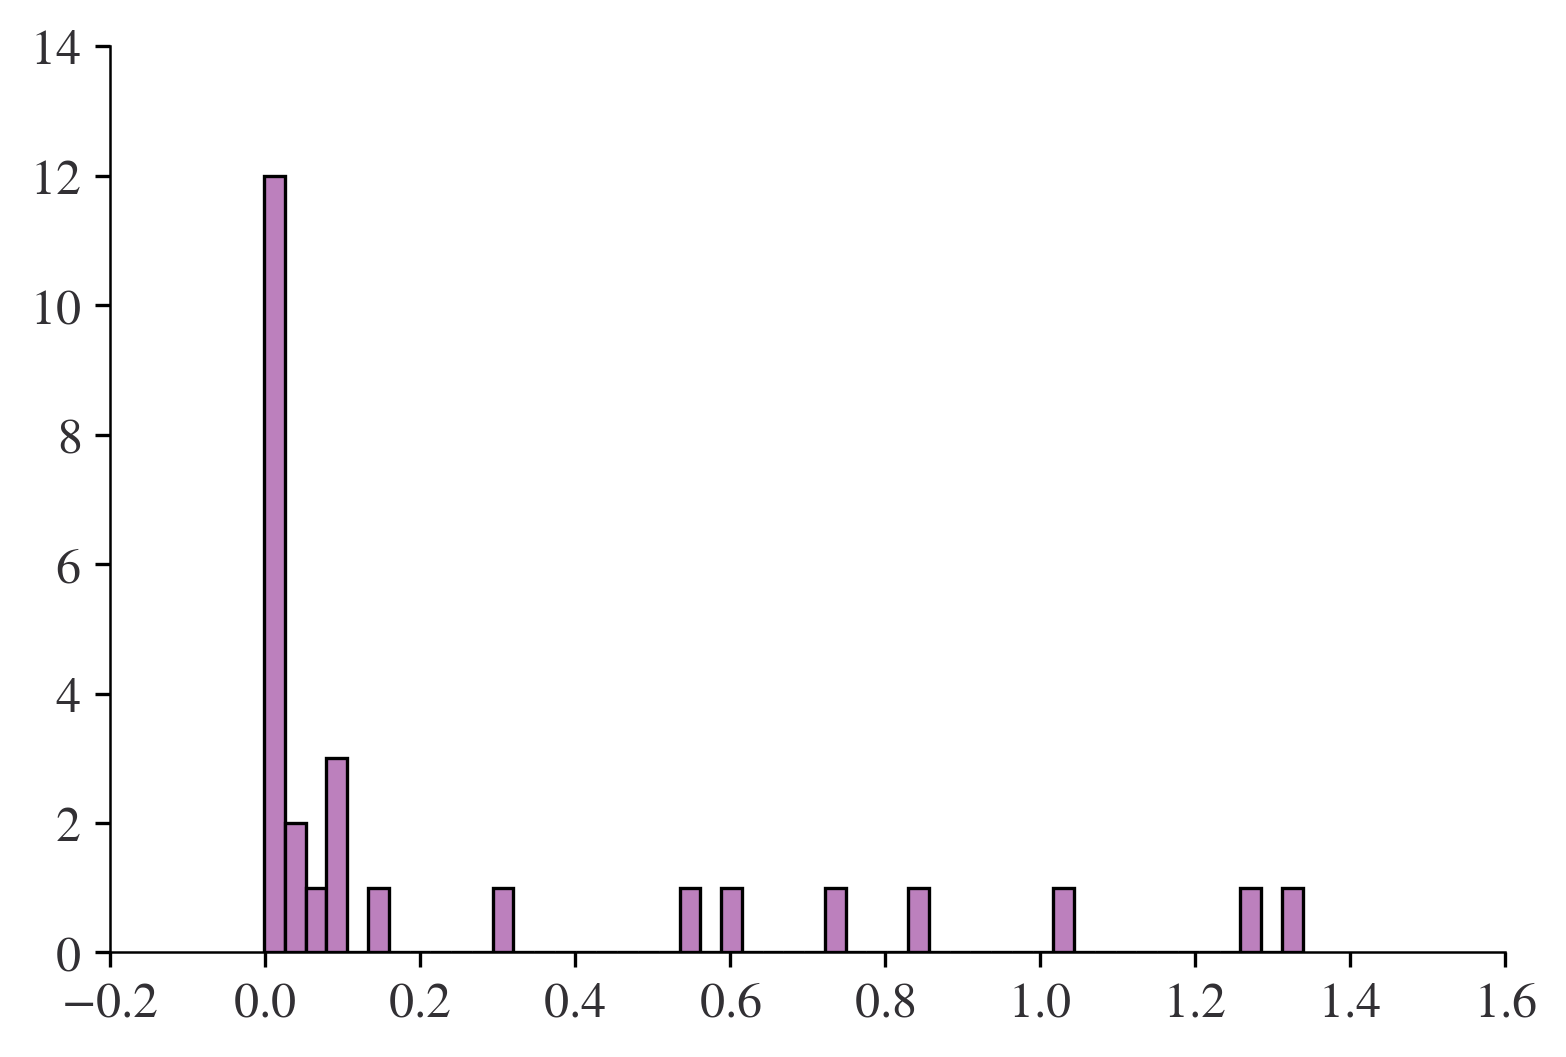

In [87]:
_=plt.hist(list(compute_lin_unb_est_dict.values()), bins=50)

In [156]:
## construct results table

In [157]:
results_table = dict()
perce =list(h0_rejected.values()).count(True)/len(list(h0_rejected.values()))

In [158]:

results_table['Unbiased Linear Estimator(Mean)'] = round(np.mean(list(compute_lin_unb_est_dict.values())), 3)
results_table['Unbiased Linear Estimator(StD)'] = round(np.std(list(compute_lin_unb_est_dict.values())), 3)
results_table['P-Stat(Mean)'] = round(np.mean(list(p_stat.values())) , 3)
results_table['P-Stat(StD)'] = round(np.std(list(p_stat.values())), 3)
results_table['Test Variance(Mean)'] = round(np.mean(list(test_variance_dict.values())), 3)
results_table['Test Variance(StD)'] = round(np.std(list(test_variance_dict.values())), 3)
results_table['Best Kernel(\\sigma^2)'] = round(best_ker.sigma2 , 3)
results_table['Test Variance'] =  round(np.mean(np.abs(list(test_variance_dict.values()))), 3)
results_table['Moment One'] = round(np.mean(list(moment_one.values())), 3)
results_table['Moment Two'] = round(np.mean(list(moment_two.values())), 3)
results_table['H0 Rejected(%)'] = "{0:.0%}".format(perce)








In [165]:
pd.DataFrame.from_dict([results_table]).T

,0
Unbiased Linear Estimator(Mean),0.273
Unbiased Linear Estimator(StD),0.41
P-Stat(Mean),0.273
P-Stat(StD),0.41
Test Variance(Mean),-0.261
Test Variance(StD),0.549
Best Kernel(\sigma^2),0.536
Test Variance,0.264
Moment One,0.273
Moment Two,0.368


In [152]:
np.mean(np.abs(list(test_variance_dict.values())))

0.2639722838762671

In [153]:
two_moments

(0.07679834203449054, 0.020005234117125886)

In [155]:
results_table

{'Unbiased Linear Estimator(Mean)': 0.273,
 'Unbiased Linear Estimator(StD)': 0.41,
 'P-Stat(Mean)': 0.273,
 'P-Stat(StD)': 0.41,
 'Test Variance(Mean)': -0.261,
 'Test Variance(StD)': 0.549,
 'Best Kernel(sigma^2)': 0.536,
 'Test Variance': 0.264,
 'Moment One': 0.273,
 'Moment Two': 0.368,
 'H0 Rejected(%)': '93%',
 'Best Kernel(\\sigma^2)': 0.536}

In [41]:
symbolChoice ='JB1'

In [49]:
list_of_files =[f for f in [f for f in [f for f in os.listdir(LinearMMDOutputFilesLoc) if str('DU1') in f] if str('alpha') in f] if str('tick') in f]

In [56]:
file_ch =1
dict_pkl = pd.read_pickle( os.path.join(LinearMMDOutputFilesLoc, list_of_files[file_ch]))
pd.DataFrame.from_dict(dict_pkl.values())

,test_result,test_variance,med_on_test_data,two_moments,compute_unbiased_linear_estimator
0,"{'alpha': 0.01, 'pvalue': 0.002157704092991241...",-4.059185e-06,0.051564,"(0.002089963465371348, 1.8498956079319536e-05)",0.002090
1,"{'alpha': 0.01, 'pvalue': 1.1698394071772235e-...",-2.312899e+00,0.357108,"(1.3253995675911192, 2.2673300270614343)",1.325400
2,"{'alpha': 0.01, 'pvalue': 1.0648496282403923e-...",-2.341016e+00,0.351929,"(1.330952007720263, 2.2709279982415187)",1.330952
3,"{'alpha': 0.01, 'pvalue': 0.001167162976604658...",-3.116373e-02,0.062471,"(0.16278867567132754, 0.09866653770884026)",0.162789
4,"{'alpha': 0.01, 'pvalue': 0.000571804834373288...",-2.886780e-06,0.082074,"(0.0016667130147157525, 9.059074354098325e-06)",0.001667
5,"{'alpha': 0.01, 'pvalue': 0.001133807250497693...",-3.149720e-06,0.078751,"(0.0025913738091047356, 2.4859893489440062e-05)",0.002591
6,"{'alpha': 0.01, 'pvalue': 0.001964960531365074...",-2.005364e-07,0.067625,"(0.0005368885712958277, 1.195851885913107e-06)",0.000537
7,"{'alpha': 0.01, 'pvalue': 0.004339380816834771...",-4.113038e-04,0.068447,"(0.03392304884271022, 0.005764085345971009)",0.033923
8,"{'alpha': 0.01, 'pvalue': 0.007193379341108695...",-6.235747e-06,0.074821,"(0.008015893443149721, 0.0003700770889749437)",0.008016
9,"{'alpha': 0.01, 'pvalue': 0.001454032093731198...",-1.979080e-04,0.073046,"(0.012845293271874884, 0.0006421908833575214)",0.012845


In [30]:
var = 'alpha'
pklpath_1 = os.path.join(LinearMMDOutputFilesLoc, str('JB1')+'_Results_Table_LinearMMD.pkl')
pklpath_2 = os.path.join(LinearMMDOutputFilesLoc, str('FB1')+'_Results_Table_LinearMMD.pkl')
pklpath_3 = os.path.join(LinearMMDOutputFilesLoc, str('RX1')+'_Results_Table_LinearMMD.pkl')


In [23]:
results_table_1 = pd.read_pickle(pklpath_1)
results_table_2 = pd.read_pickle(pklpath_2)
results_table_3 = pd.read_pickle(pklpath_3)


In [24]:
results_table_1

{'Unbiased Linear Estimator(Mean)': 0.579,
 'Unbiased Linear Estimator(StD)': 0.424,
 'P-Stat(Mean)': 0.579,
 'P-Stat(StD)': 0.424,
 'Test Variance(Mean)': -0.568,
 'Test Variance(StD)': 0.609,
 'Best Kernel(\\sigma^2)': 0.11089528678063716,
 'Test Variance': 0.568,
 'Moment One': 0.579,
 'Moment Two': 0.763,
 'H0 Rejected(%)': '96%'}

In [215]:
pd.DataFrame.from_dict([results_table_1])

,Unbiased Linear Estimator(Mean),Unbiased Linear Estimator(StD),P-Stat(Mean),P-Stat(StD),Test Variance(Mean),Test Variance(StD),Best Kernel(\sigma^2),Test Variance,Moment One,Moment Two,H0 Rejected(%)
0,0.579,0.424,0.579,0.424,-0.568,0.609,0.110895,0.568,0.579,0.763,96%


In [25]:
jb1 = pd.DataFrame.from_dict([results_table_1]).T.rename({0:'JB1'},axis=1)
fb1 = pd.DataFrame.from_dict([results_table_2]).T.rename({0:'FB1'},axis=1)
rx1 = pd.DataFrame.from_dict([results_table_3]).T.rename({0:'RX1'},axis=1)


In [26]:
df_conc = pd.concat([jb1, fb1, rx1], axis=1)

In [27]:
print(df_conc.to_latex())

\begin{tabular}{llll}
\toprule
{} &       JB1 &        FB1 &        RX1 \\
\midrule
Unbiased Linear Estimator(Mean) &     0.579 &      0.273 &      0.278 \\
Unbiased Linear Estimator(StD)  &     0.424 &       0.41 &      0.417 \\
P-Stat(Mean)                    &     0.579 &      0.273 &      0.278 \\
P-Stat(StD)                     &     0.424 &       0.41 &      0.417 \\
Test Variance(Mean)             &    -0.568 &     -0.261 &     -0.271 \\
Test Variance(StD)              &     0.609 &      0.549 &      0.558 \\
Best Kernel(\textbackslash sigma\textasciicircum 2)           &  0.110895 &  0.0820429 &  0.0847413 \\
Test Variance                   &     0.568 &      0.264 &      0.273 \\
Moment One                      &     0.579 &      0.273 &      0.278 \\
Moment Two                      &     0.763 &      0.368 &      0.379 \\
H0 Rejected(\%)                  &       96\% &        93\% &        92\% \\
\bottomrule
\end{tabular}



In [10]:
import os
file_to_load = os.path.join(LinearMMDOutputFilesLoc, str('DU1')+'_'+str('alpha')+'_Results_Table_LinearMMD.pkl')

In [15]:
loaded_dict = pd.read_pickle(file_to_load)

In [20]:
list(loaded_dict.keys())

['Unbiased Linear Estimator(Mean)',
 'Unbiased Linear Estimator(StD)',
 'P-Stat(Mean)',
 'P-Stat(StD)',
 'Test Variance(Mean)',
 'Test Variance(StD)',
 'Best Kernel(\\sigma^2)',
 'Test Variance',
 'Moment One',
 'Moment Two',
 'H0 Rejected(%)']

In [39]:
symbolChoice = 'DU1'
SymbolLinearMMDOutputFiles = [f for f in LinearMMDOutputFiles if str(symbolChoice) in f]
variable_choice = 'tau'
variableChoiceFiles = [f for f in [f for f in SymbolLinearMMDOutputFiles if str(variable_choice) in f] if
                       str('_linear_') in f]


In [40]:
variableChoiceFiles

['DU1_tau_shift_1_wind_5_linear_test_ONE.pkl',
 'DU1_tau_shift_1_wind_5_linear_test_TWO.pkl',
 'DU1_tau_shift_2_wind_5_linear_test_ONE.pkl',
 'DU1_tau_shift_2_wind_5_linear_test_TWO.pkl',
 'DU1_tau_shift_2_wind_6_linear_test_ONE.pkl',
 'DU1_tau_shift_2_wind_6_linear_test_TWO.pkl',
 'DU1_tau_shift_3_wind_6_linear_test_ONE.pkl',
 'DU1_tau_shift_3_wind_6_linear_test_TWO.pkl',
 'DU1_tau_shift_3_wind_8_linear_test_ONE.pkl',
 'DU1_tau_shift_3_wind_8_linear_test_TWO.pkl',
 'DU1_tau_shift_3_wind_10_linear_test_ONE.pkl',
 'DU1_tau_shift_3_wind_10_linear_test_TWO.pkl',
 'DU1_tau_shift_1_wind_1_linear_test_ONE.pkl',
 'DU1_tau_shift_1_wind_1_linear_test_TWO.pkl',
 'DU1_tau_shift_1_wind_2_linear_test_ONE.pkl',
 'DU1_tau_shift_1_wind_2_linear_test_TWO.pkl',
 'DU1_tau_shift_1_wind_3_linear_test_ONE.pkl',
 'DU1_tau_shift_1_wind_3_linear_test_TWO.pkl',
 'DU1_tau_shift_1_wind_6_linear_test_ONE.pkl',
 'DU1_tau_shift_1_wind_6_linear_test_TWO.pkl',
 'DU1_tau_shift_1_wind_8_linear_test_ONE.pkl',
 'DU1_tau_s